In [33]:
import numpy as np 
import pandas as pd
import pylab
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [34]:
pdf = pd.read_csv('Mall_Customers.csv')
print ("Shape of dataset: ", pdf.shape)
pdf.head()

Shape of dataset:  (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
# pdf['Genre']=pdf['Genre'].astype('category').cat.codes

In [36]:
featureset = pdf[['Genre',  'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [37]:
from sklearn.preprocessing import MinMaxScaler
featureset['Genre']=featureset['Genre'].astype('category').cat.codes
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

C:\Users\Amin\AppData\Local\Temp\ipykernel_6208\1948678911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset['Genre']=featureset['Genre'].astype('category').cat.codes


array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

In [38]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [39]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Amin\AppData\Local\Temp\ipykernel_6208\3518085107.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


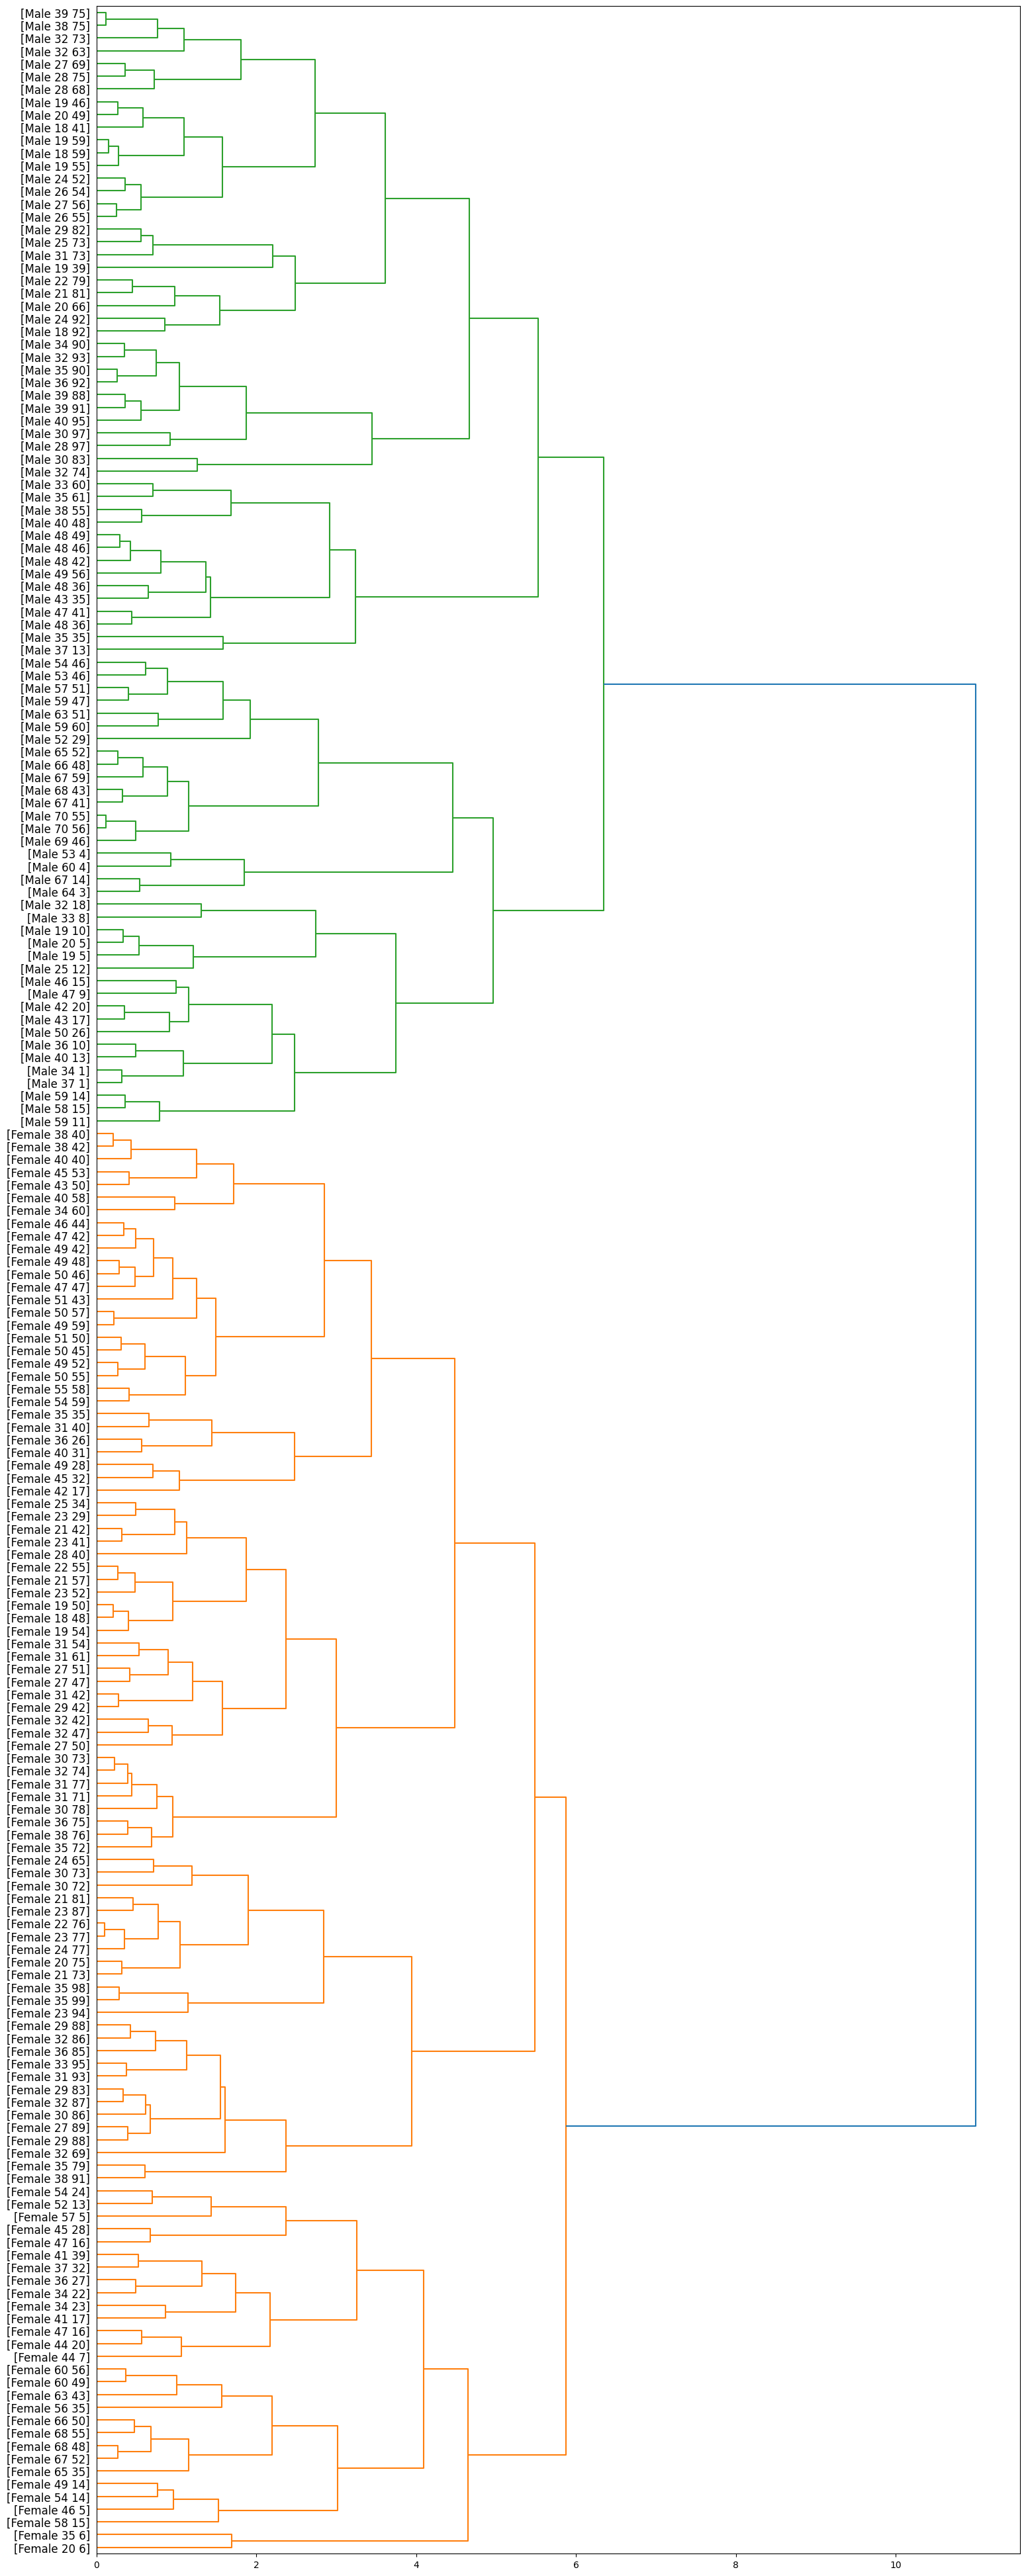

In [40]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['Genre'][id], int(float(pdf['Age'][id])), int(float(pdf['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [41]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

c:\Users\Amin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 0, 4, 1, 0, 1, 2, 0, 4, 1,
       3, 1, 3, 1, 0, 4, 0, 0, 2, 0, 2, 1, 3, 0, 0, 0, 0, 0, 3, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 4, 0, 2, 0, 2, 2, 1, 3, 0, 2, 1,
       0, 3, 1, 0, 2, 0, 3, 3, 2, 1, 0, 4, 0, 0, 2, 4, 2, 0, 0, 4, 0, 0,
       0, 0, 3, 1, 4, 0, 0, 1, 0, 0, 4, 1, 0, 0, 2, 1, 4, 0, 3, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 3, 1, 2, 0, 3, 1, 0, 0, 2, 1, 4, 0, 3, 1, 2, 1, 3, 0,
       3, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 3, 1, 2, 1, 2, 1, 3, 0,
       2, 1, 2, 1, 3, 0, 2, 0, 3, 1, 3, 1, 3, 0, 3, 0, 2, 0, 3, 0, 3, 1,
       2, 1])

In [42]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


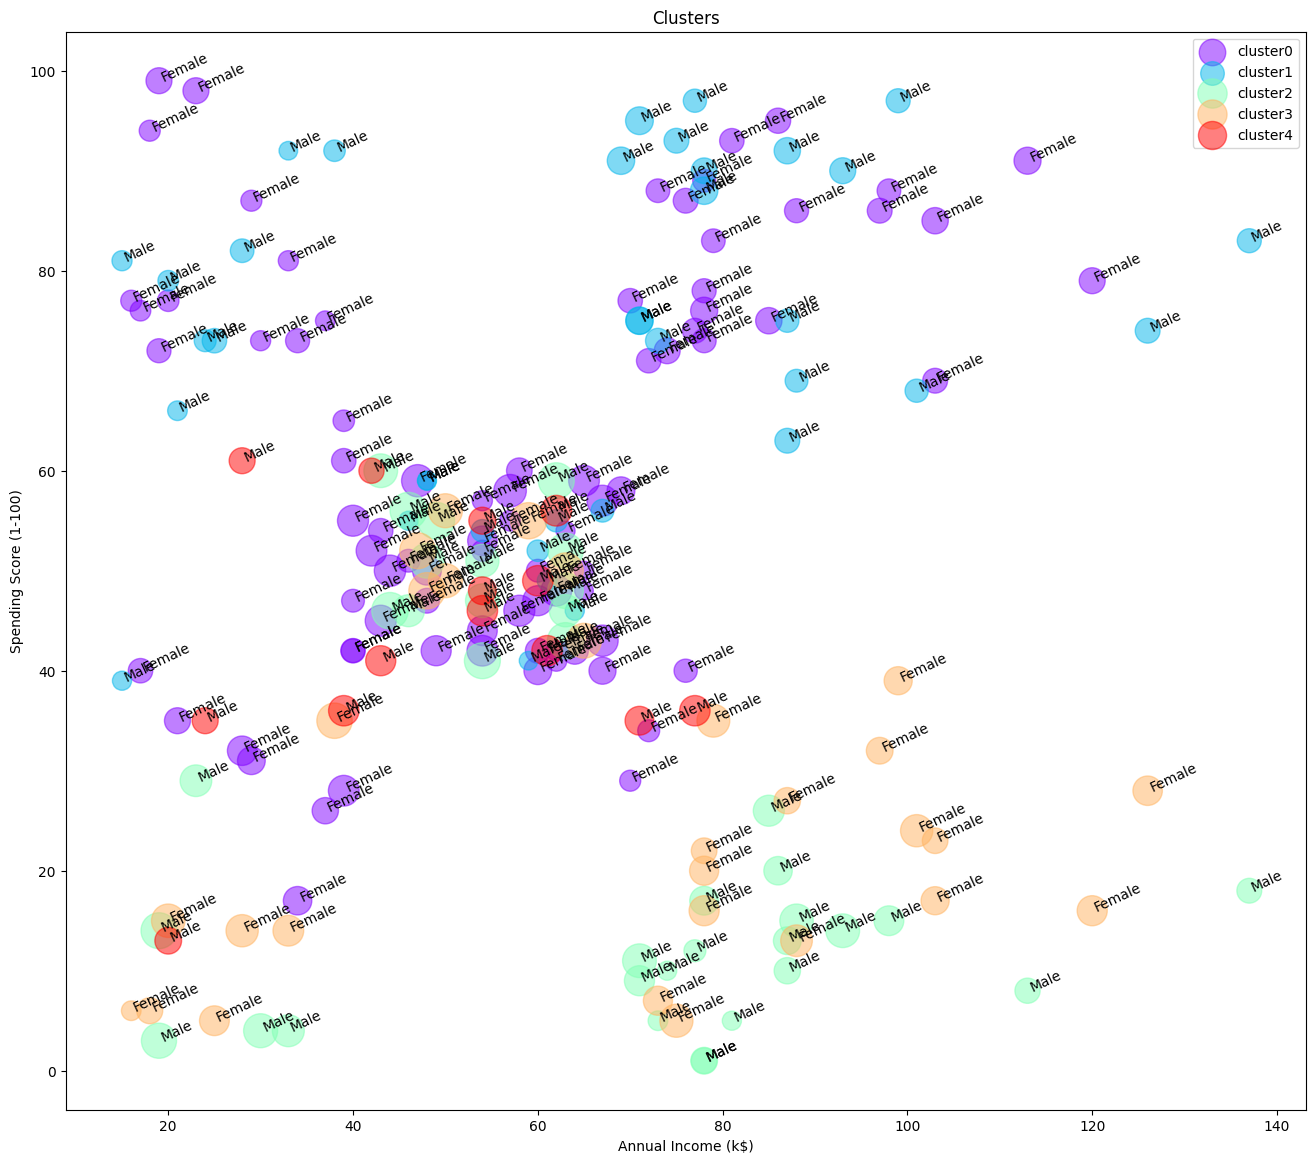

In [47]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]  # Make sure 'cluster_' matches your column name
    for i in subset.index:
        plt.text(subset['Annual Income (k$)'][i], 
                 subset['Spending Score (1-100)'][i], 
                 str(subset['Genre'][i]),  # Only one text item here
                 rotation=25) 
    plt.scatter(subset['Annual Income (k$)'], 
                subset['Spending Score (1-100)'], 
                s=subset.Age*10, 
                c=[color],  # Note the color is wrapped in a list
                label='cluster'+str(label),
                alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()